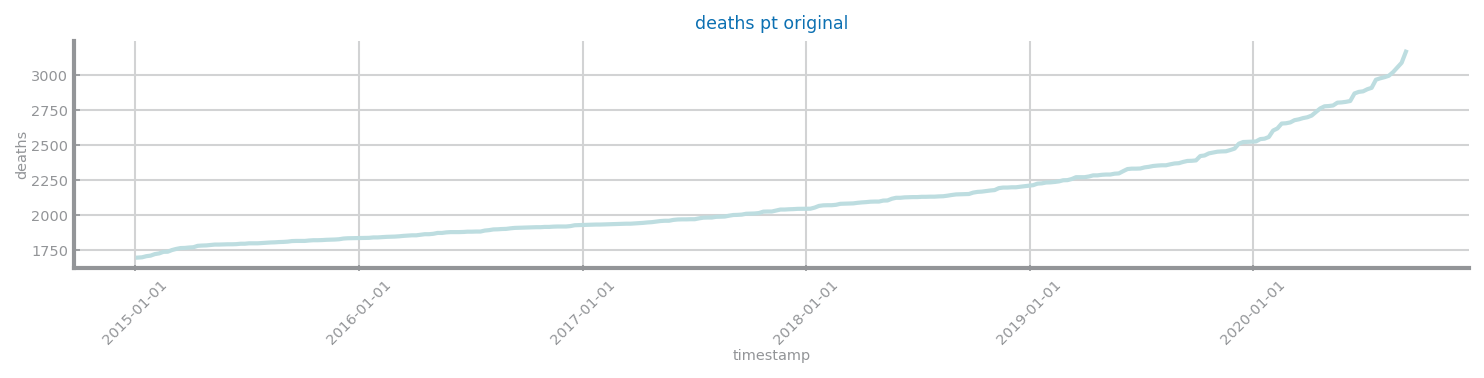

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts
import ds_functions as ds

data = pd.read_csv('deaths_pt.csv', index_col='start_date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)
data = data.asfreq('W-Mon').dropna()

x_label='timestamp'
y_label='deaths'
plt.figure(figsize=(3*ts.HEIGHT, ts.HEIGHT/2))
ts.plot_series(data, x_label=x_label, y_label=y_label, title='deaths pt original')
plt.xticks(rotation = 45)
plt.show()

<Figure size 1800x300 with 0 Axes>

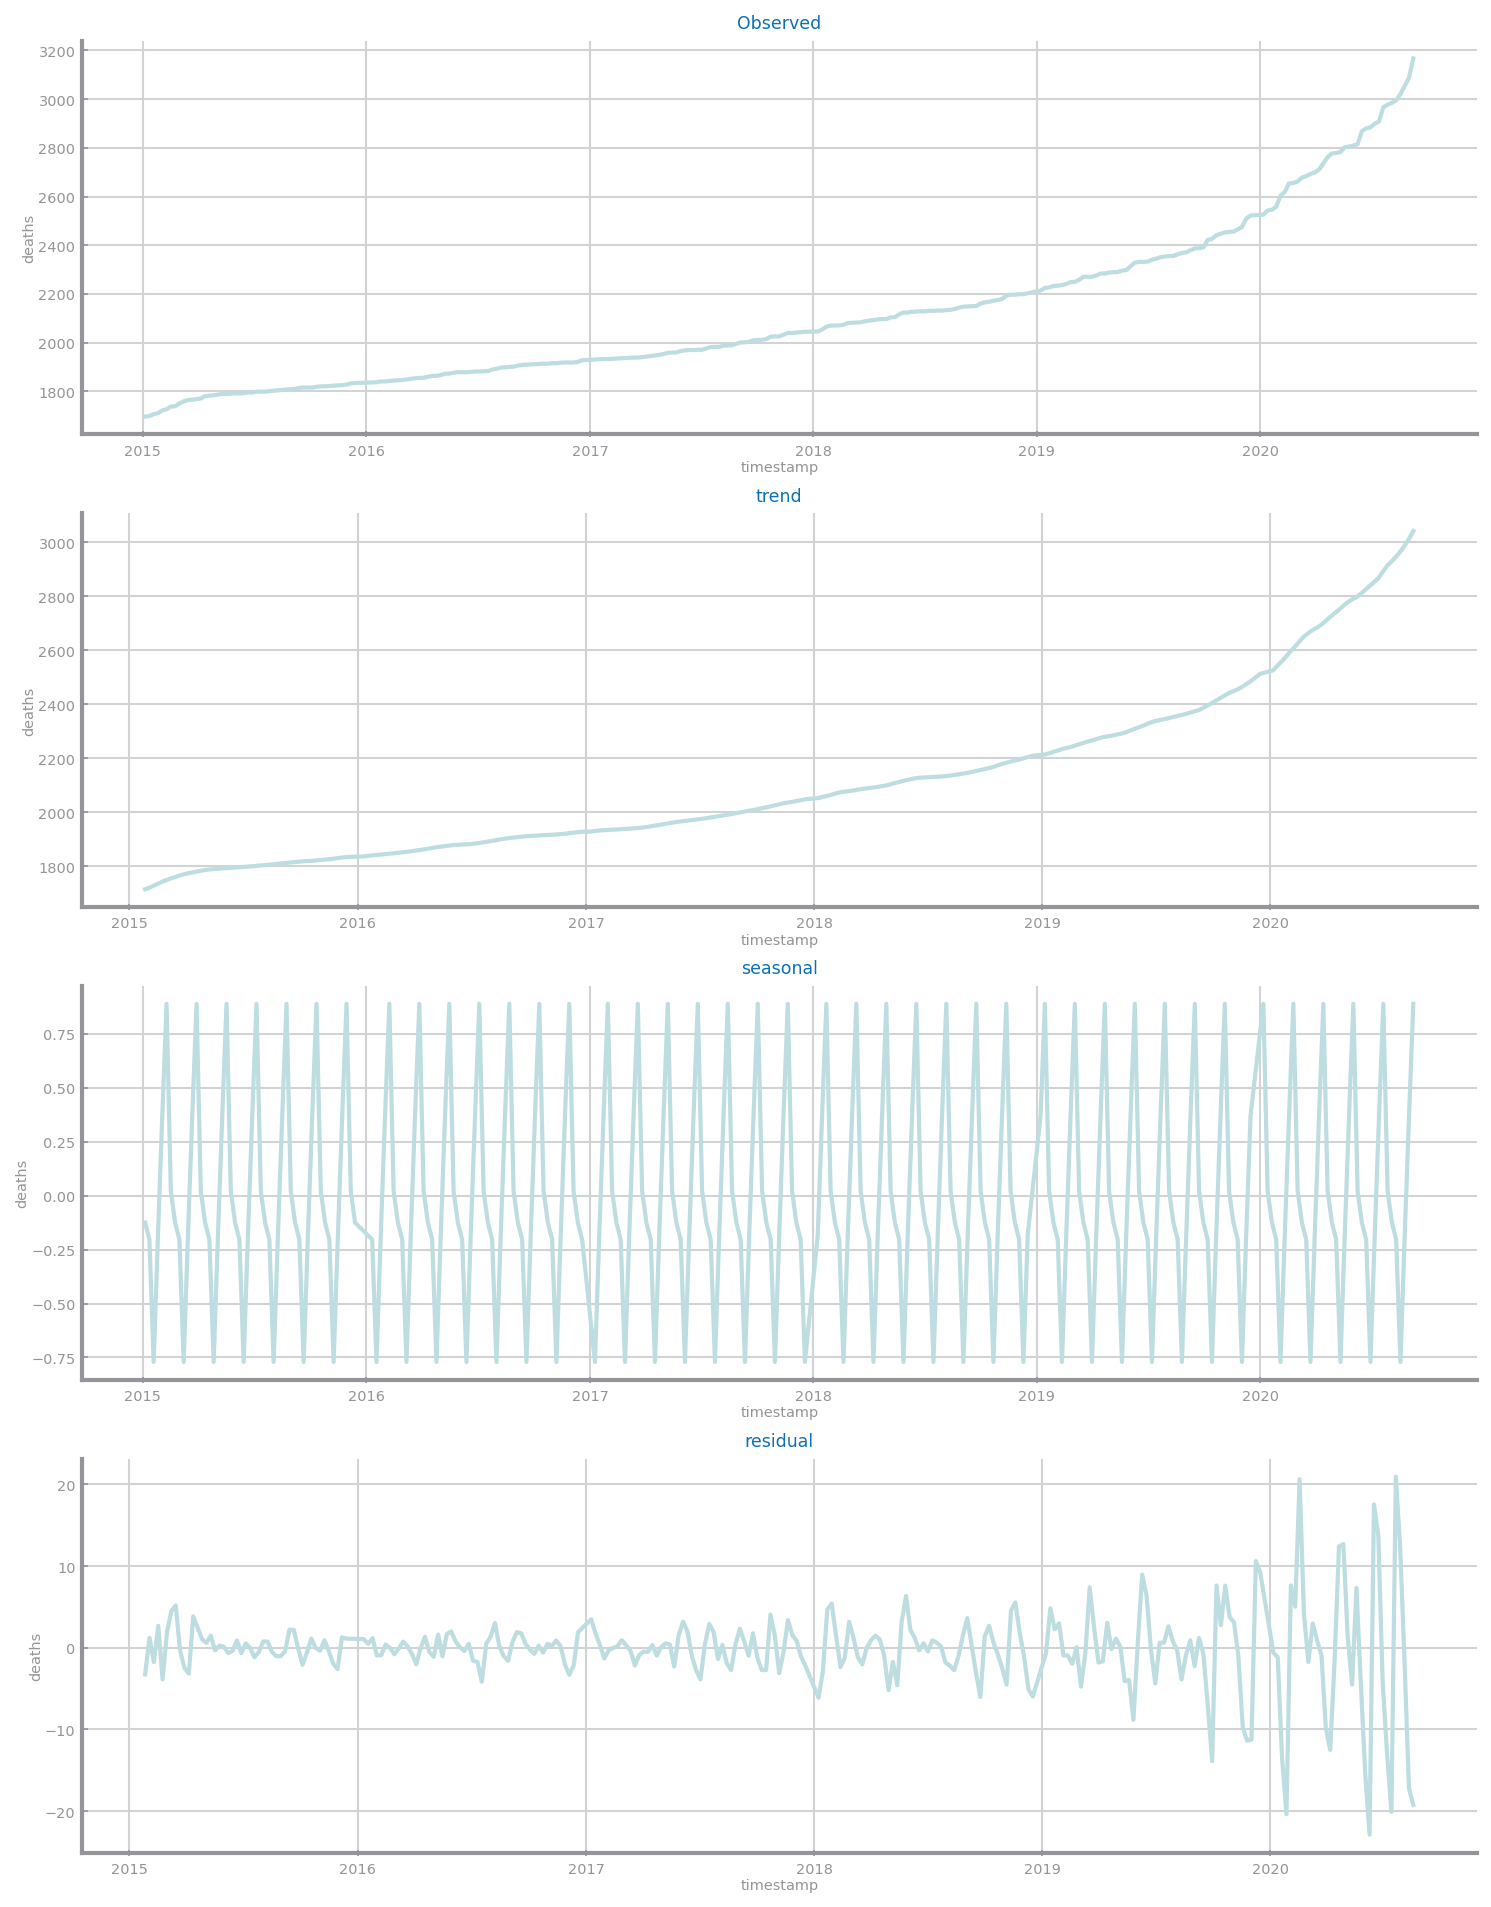

In [2]:
import statsmodels.tsa.seasonal as seasonal

FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2

def plot_components(series: pd.Series, comps: seasonal.DecomposeResult, x_label: str = 'time', y_label:str =''):
    lst = [('Observed', series), ('trend', comps.trend), ('seasonal', comps.seasonal), ('residual', comps.resid)]
    _, axs = plt.subplots(len(lst), 1, figsize=(3*ts.HEIGHT, ts.HEIGHT*len(lst)))
    for i in range(len(lst)):
        axs[i].set_title(lst[i][0])
        axs[i].set_ylabel(y_label)
        axs[i].set_xlabel(x_label)
        axs[i].plot(lst[i][1])

#limpar a primeira semana do dataset
decomposition = seasonal.seasonal_decompose(data, model = "add", period = 7)
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_components(data, decomposition, x_label='timestamp', y_label='deaths')
plt.show()

# Arima

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


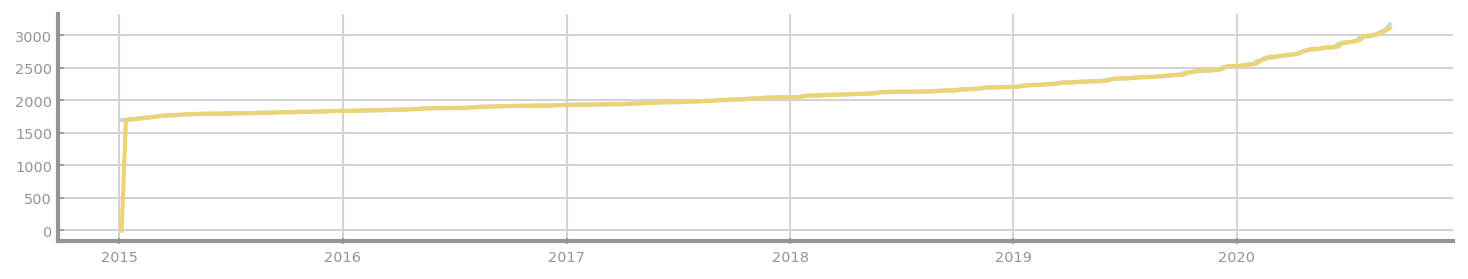

In [3]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

df = data
model = ARIMA(df, order=(2,1,2))
results = model.fit()
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plt.plot(df)
plt.plot(results.fittedvalues)
plt.show()

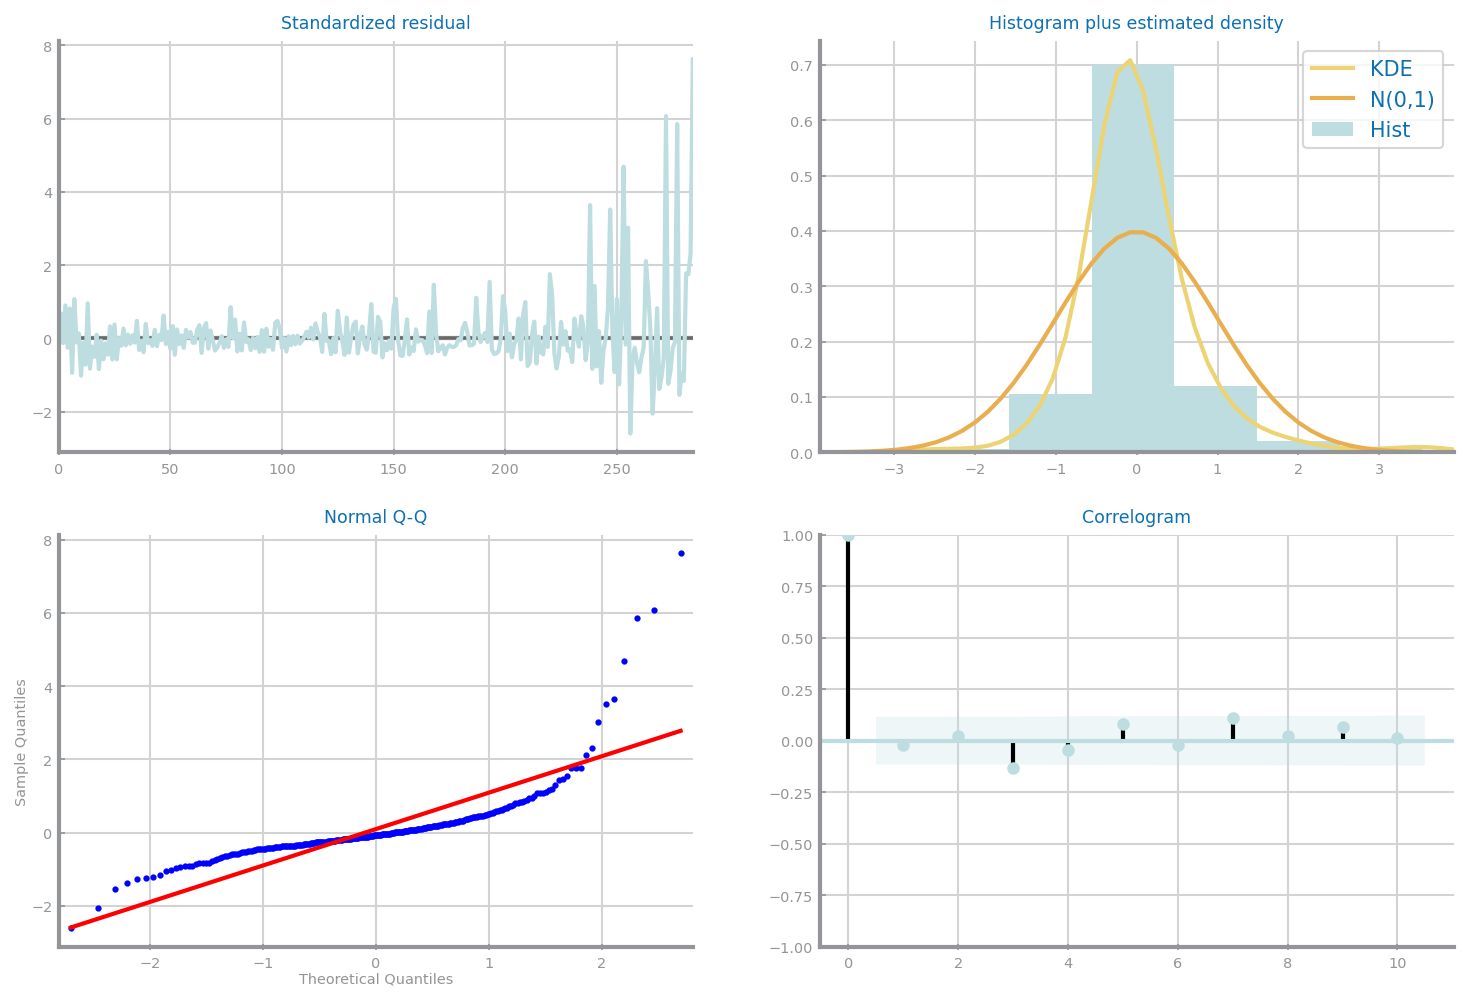

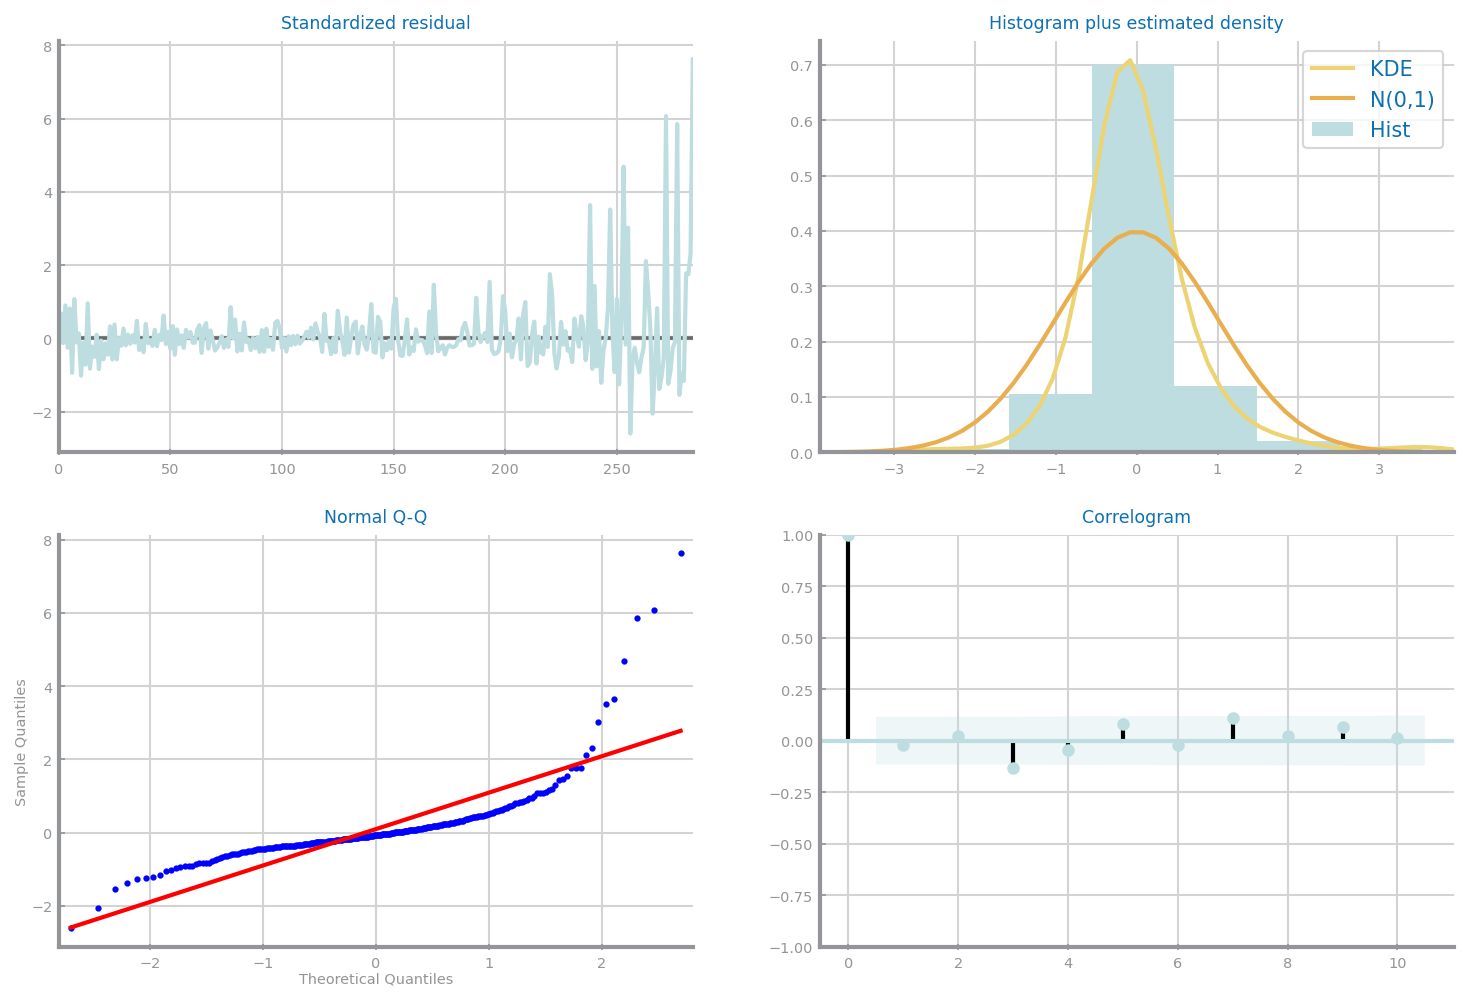

In [4]:
results.plot_diagnostics(figsize=(FIG_WIDTH, 4*FIG_HEIGHT))

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provide

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so wi

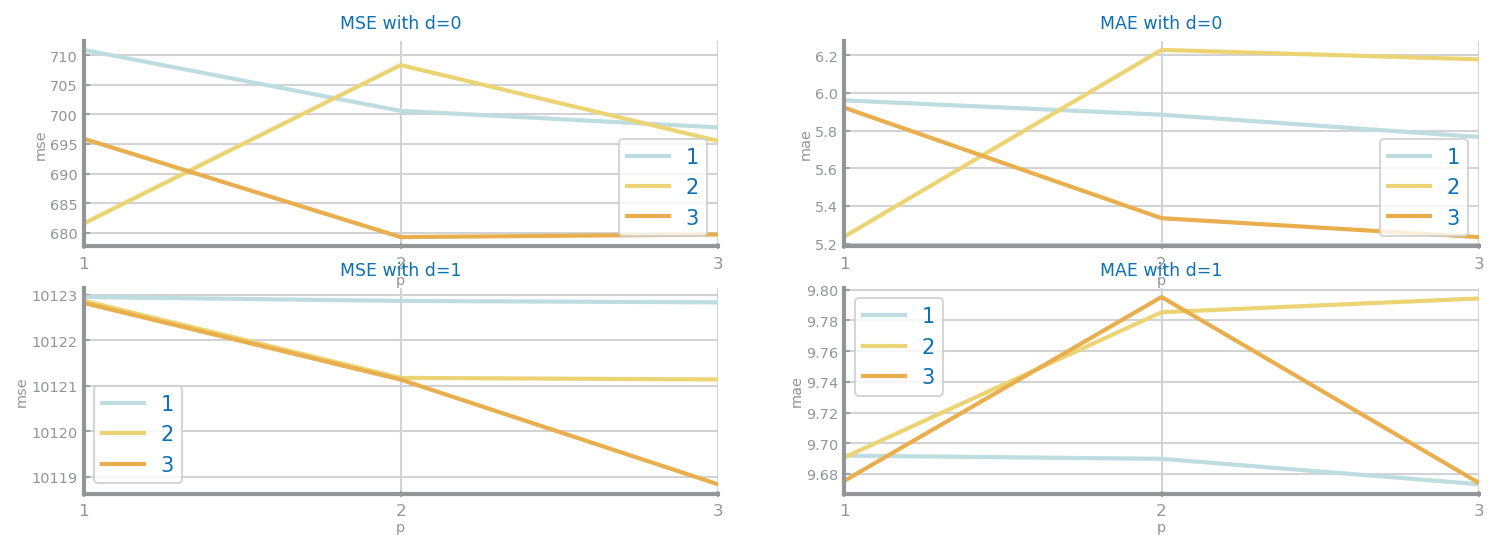

In [5]:
_, axs = plt.subplots(2, 2, figsize=(FIG_WIDTH, 2*FIG_HEIGHT))
params = (1, 2, 3)
for d in (0, 1):
    mse = {}
    mae = {}
    for p in params:
        mse_lst = []
        mae_lst = []
        for q in params:
            mod = ARIMA(df, order=(p, d, q))
            results = mod.fit()
            mse_lst.append(results.mse)
            mae_lst.append(results.mae)
        mse[p] = mse_lst
        mae[p] = mae_lst
    ds.multiple_line_chart(params, mse, ax=axs[d, 0], title=f'MSE with d={d}', xlabel='p', ylabel='mse')
    ds.multiple_line_chart(params, mae, ax=axs[d, 1], title=f'MAE with d={d}', xlabel='p', ylabel='mae')
plt.show()

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization

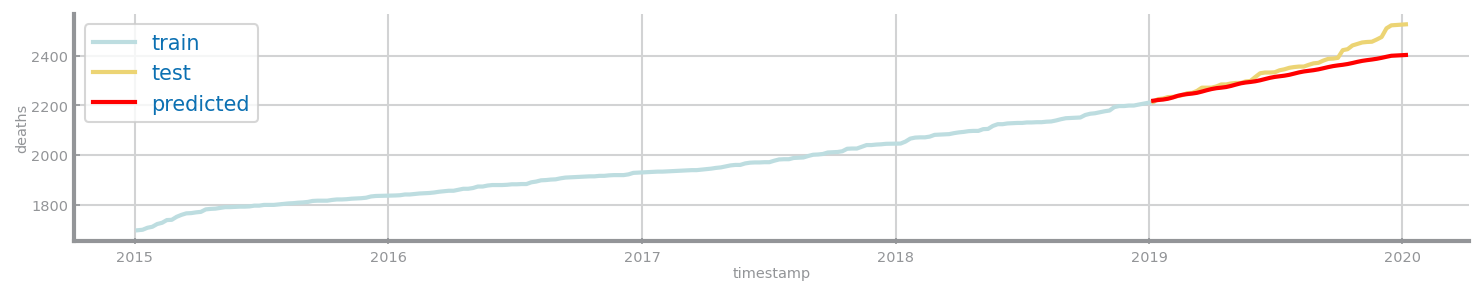

In [6]:
def plot_forecasting(train: pd.Series, test: pd.Series, pred,
                     ax: plt.Axes=None, x_label: str = 'time', y_label:str =''):
    if ax is None:
        ax = plt.gca()
    ax.plot(train, label='train')
    ax.plot(test, label='test')
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.plot(pred.index, pred.values, label='predicted', color='r')
    plt.legend()

p, d, q = 10, 1, 10
n = len(df)
train = df[:201]
test = df[200:251]

mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = 201, end = 251)

pred = pd.Series(pred.values, test.index) 

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization

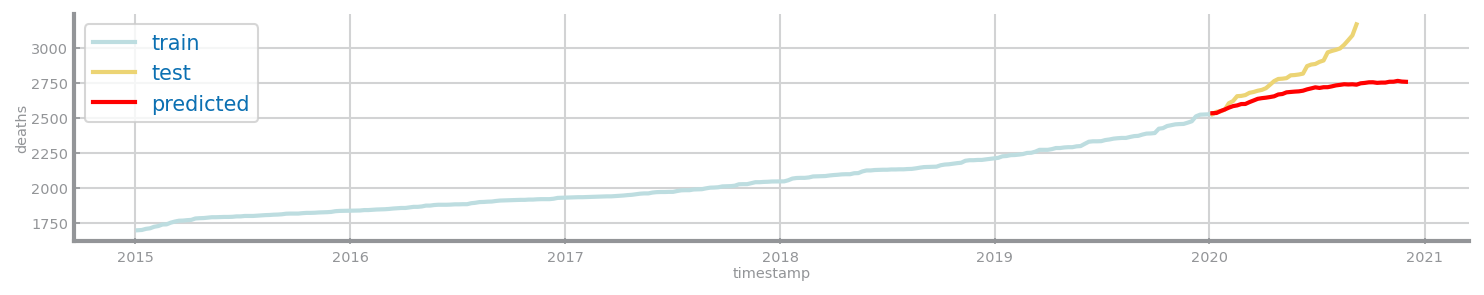

In [7]:
from datetime import timedelta

p, d, q = 10, 1, 10
n = len(df)
train = df[:251]
test = df[250:]

mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = 250, end=297)


last_date = test.index[-1]
l = []
for i in range(298-len(df)):
    last_date += timedelta(weeks=1)
    l.append(last_date) 

pred = pd.Series(pred.values, test.index.append(pd.to_datetime(l))) 

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()

C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Utilizador\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization

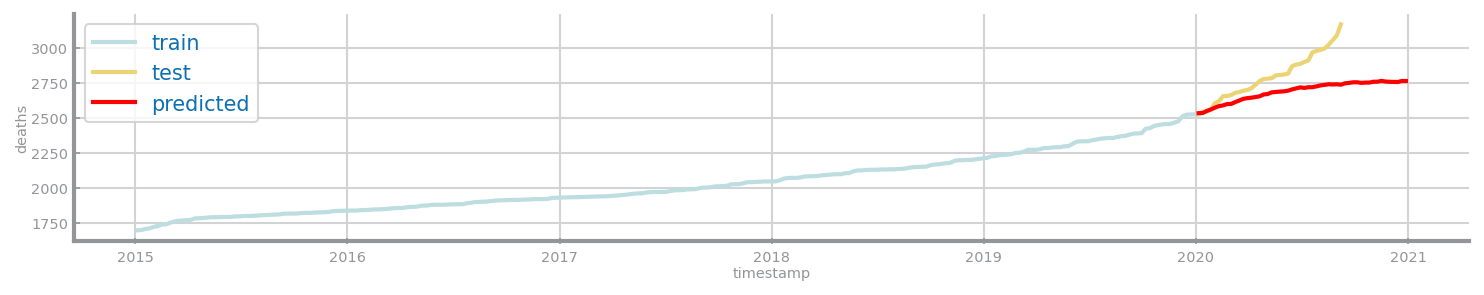

In [8]:
from datetime import timedelta

p, d, q = 10, 1, 10
n = len(df)
train = df[:251]
test = df[250:]

mod = ARIMA(train, order=(p, d, q))
mod = mod.fit()
pred = mod.predict(start = 250, end=297+4)


last_date = test.index[-1]
l = []
for i in range(298-len(df)+4):
    last_date += timedelta(weeks=1)
    l.append(last_date) 

pred = pd.Series(pred.values, test.index.append(pd.to_datetime(l))) 

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
plot_forecasting(train, test, pred, x_label=x_label, y_label=y_label)
plt.show()